<a href="https://colab.research.google.com/github/AdrianoHKim/Soulcode/blob/main/projeto_bnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Análise de Dados<br><br>
Estratégias de Análise de Dados com foco no negócio, usando uma base de dados da empresa Airbnb.<br>         
Projeto da SoulCode Academy, para o Bootcamp de Análise de dados.<br>      
Ministrado pela professora Franciane Rodrigues, auxiliado por Jonathas Carneiro. <br>      
Data: 07/06/2023  
Turma: AD2  
Período: 6ª semana do Bootcamp <br>      
Aluno: Adriano Kim

# **Requisitos**

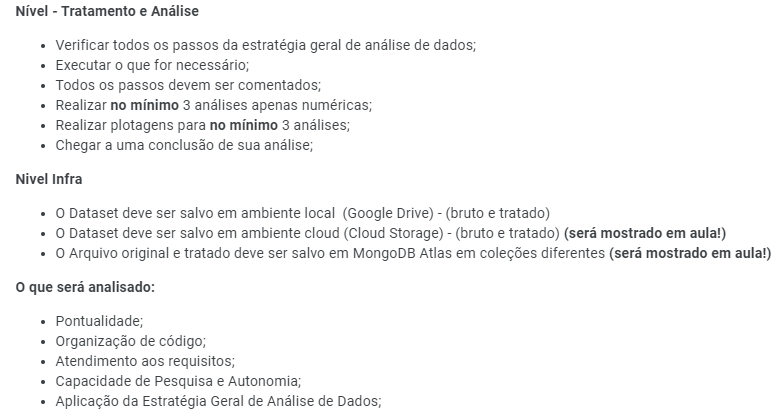

# Sobre os Dados:   


Este conjunto de dados abrange os preços do Airbnb na cidade de AMSTERDAM, durante os dias de semana apenas, fornecendo informações detalhadas sobre características das listagens, como tipos de quartos, classificações de limpeza e satisfação, número de quartos e distância do centro da cidade. Utilizando métodos econômicos espaciais, a análise identifica os fatores que influenciam os preços do Airbnb nessa cidade durante a semana.

Fonte: https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities

## Legenda de Dados:

* Unnamed(id): id dos registros
* realSum(preco_total): Preço total da locação para duas pessoas e duas noites em EUROS
* room_type(tipo_locacao): Categoria da locação
    * 1 - CASA INTEIRA/APTO.
    * 2 - QUARTO PRIVADO
    * 3 - QUARTO COMPARTILHADO
* room_shared: Indica se o quarto é compartilhado ou não
* room_private: Indica se o quarto é privado ou não  
* person_capacity(capacidade): Número máximo de hóspedes permitidos na locação
* host_is_superhost(superhost): Indica se o host é um superhost ou não (0 = False, 1 = True)
* multi: Se a locação pertence ou não a hosts que tem de 2 a 4 anúncios no Airbnb (0 = False, 1 = True)
* biz: Se a locação pertence ou não a hosts com mais de 4  anúncios no Airbnb (0 = False, 1 = True)
* cleanliness_rating(nota_limpeza): Classificação de limpeza (0 - 10)
* guest_satisfaction_overall(satisfacao): Satisfação geral do hóspede (0 - 100)  
* bedrooms(quartos): Quantidade de quartos
* dist: Distância em relação ao centro da cidade em KM  
* metro_dist: Distância em relação à estação de metrô mais próxima em KM
* attr_index: Índice ou score de atratividade/interesse das proximidades do local do anúncio
* attr_index_norm(score_atracao): Índice ou score de atratividade normalizado (0-100)
* rest_index: Índice ou score relacionado à disponibilidade de restaurantes ou opções gastronômicas nas proximidades do anúncio
rest_index_norm(score_rest): Índice ou score sobre opções de restaurantes normalizado (0-100)
* lng: Longitude do local do anúncio
* lat: Latitude do local do anúncio


Fontes:<br>  
https://www.kaggle.com/code/akramhussainkhan/insights-from-airbnb-analysis<br>  
https://zenodo.org/record/4446043#.Y9Y7ZtJBwUE<br>  
https://www.sciencedirect.com/science/article/pii/S0261517721000388?via%3Dihub#sec3



# **Problema de négocio**

Pergunta de negócio: Faça uma análise exploratória de dados com a base de dados do Airbnb e indique possíveis oportunidades e/ou ameaças para o empreendimento.

## Aplicação dos 5W

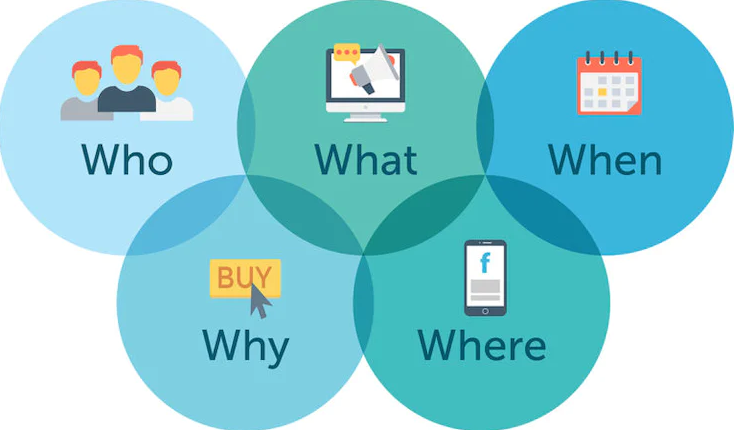

Who (Quem): Quem está envolvido? A empresa Airbnb, locadores e hóspedes.<br>  
What (O que): O que aconteceu? Surgiu a necessidade de analisar e descobrir as possíveis oportunidades e ameaças no négocio.<br>    
When (Quando): Quando aconteceu? Durante uma reunião, a empresa decidiu criar um plano para melhorias e crescimento.<br>  
Where (Onde): Onde aconteceu? Aconteceu na Airbnb de Amsterdam. <br>  
Why (Por quê): Por que aconteceu? Aconteceu necessariamente, já que toda empresa visa a evolução, crescimento e melhoria de seus serviços.

# Instalação do panderas

In [ ]:
!pip install gcsfs    # para usar o google cloud
!pip install pandera  # para usar o pandera

# Instalação de bibliotecas/pacotes(Libs)

In [ ]:
# Importação de bibliotecas/pacotes ou libs(library)

# 'x' as 'y': quer dizer que posso 'chamar' algum método da lib 'x' pelo apelido 'y'
import pandas as pd              # lib para tratar e vizualizar os dados
import numpy as np               # lib para executar uma ampla variedade de operações matemáticas em matrizes.
import pandera as pa             # lib para validação da schema
import matplotlib.pyplot as plt  # lib para plotar gráficos
import os                        # Importar a biblioteca "os" para interagir com o sistema operacional
import seaborn as sns            # lib para plotar gráficos

from  google.cloud import storage  # usado para extrair e carregar dados para o Google Cloud
from google.colab import drive  # usado para extrair e carregar dados para o Google Drive


In [ ]:
# Ignorar avisos

import warnings
warnings.filterwarnings("ignore")


# Extração

*   **Tipos de separador:** Vírgula (,) - Ponto e vírgula (;) - Tabulação (\t) - Espaço em branco ( )
*   Enconding:
 * ASCII (American Standard Code for Information Interchange): É um conjunto de caracteres que representa os caracteres alfanuméricos básicos da língua inglesa e alguns caracteres de controle. Usa apenas 7 bits para representação.

 * ISO-8859-1 (também conhecido como Latin-1): É uma extensão do ASCII que inclui caracteres adicionais usados em línguas europeias ocidentais. Usa 8 bits para representação.

 * UTF-8 (Unicode Transformation Format, 8 bits): É uma codificação de caracteres que suporta todo o conjunto de caracteres Unicode. Usa uma codificação de comprimento variável, onde caracteres comuns são representados em 1 byte, mas pode chegar a até 4 bytes para caracteres menos comuns. É compatível com ASCII.

 * UTF-16 (Unicode Transformation Format, 16 bits): É uma codificação de caracteres que suporta todo o conjunto de caracteres Unicode. Usa 2 bytes (16 bits) para representar a maioria dos caracteres, mas pode usar 4 bytes para alguns caracteres menos comuns.

 * UTF-32 (Unicode Transformation Format, 32 bits): É uma codificação de caracteres que suporta todo o conjunto de caracteres Unicode. Usa 4 bytes (32 bits) para representar todos os caracteres, garantindo um tamanho fixo para cada caractere.

## Extração pelo Google Cloud

*   Documentação: https://cloud.google.com/docs/authentication?hl=pt-br

In [ ]:
# Exemplo extraindo do Google Cloud

serviceAccount = '/content/the-ridge-389814-be32070fb059.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

'''
Criando a key
iam admin -> service accounts -> create service acc -> colocar nome ->
colocar uma descricao -> create and continue -> select role -> owner(no nosso caso) -> clica no acesso ->
add key -> json -> baixa a key -> mover o arquivo baixado para a area de arquivos/drive do collab
-> copia o caminho e cola no **service account.
'''


'\nCriando a key\niam admin -> service accounts -> create service acc -> colocar nome ->\ncolocar uma descricao -> create and continue -> select role -> owner(no nosso caso) -> clica no acesso ->\nadd key -> json -> baixa a key -> mover o arquivo baixado para a area de arquivos/drive do collab\n-> copia o caminho e cola no **service account.\n'

In [ ]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET

client = storage.Client()
bucket = client.get_bucket('bucket_do_kimzera')
bucket.blob('airbnb.csv')
path = 'gs://bucket_do_kimzera/projeto_airbnb/raw/airbnb.csv'  # clicar no 3pontinhos do csv ou arquivo -> copiar o gsutil URI


In [ ]:
# Abertura da base de dados e cópia de segurança (bucket)

df = pd.read_csv(path)
                 # sep=';',  # não é necessário
                 # encoding='ISO-8859-1',  # a tabela está em inglês, não é necessário
                 # dayfirst = True)  # o dataframe não possui datas

dfback = df.copy()  # cria um backup local da df


## Extração pelo Google Drive

In [ ]:
# Comando de abertura para Google Drive
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [ ]:
# Extração por Google Drive

# etapas: clique com botao direito -> copy path -> colar entre as aspas do codigo abaixo
'''
df = pd.read_csv('/content/drive/MyDrive/soulcode_bootcamp/airbnb.csv')
                 # sep=';',  # testar os separadores(abrindo o csv no excel e conferindo os separadores! nesse caso nao precisou!
                 # encoding = 'ISO-8859-1',  # configurando o enconding, tem que testar, se estiver tudo em ingles nao precisa!
                 # parse_dates = ['ocorrencia_dia'], # Não tem data nessa tabela! entao nao precisou
                 # dayfirst = True)  # Não tem data nessa tabela! entao nao precisou

dfback = df.copy()  # primeiro backup, por segurança sempre fazer.
'''

"\ndf = pd.read_csv('/content/drive/MyDrive/soulcode_bootcamp/airbnb.csv')\n                 # sep=';',  # testar os separadores(abrindo o csv no excel e conferindo os separadores! nesse caso nao precisou!\n                 # encoding = 'ISO-8859-1',  # configurando o enconding, tem que testar, se estiver tudo em ingles nao precisa!\n                 # parse_dates = ['ocorrencia_dia'], # Não tem data nessa tabela! entao nao precisou\n                 # dayfirst = True)  # Não tem data nessa tabela! entao nao precisou\n\ndfback = df.copy()  # primeiro backup, por segurança sempre fazer.\n"

# Back Up

In [ ]:
'''
A utilidade do dfbackup = df.copy() é preservar os dados originais e
fornecer uma base segura para realizar análises e transformações nos
dados sem alterá-los diretamente.
'''

# dfbackup = df.copy()


'\nA utilidade do dfbackup = df.copy() é preservar os dados originais e\nfornecer uma base segura para realizar análises e transformações nos\ndados sem alterá-los diretamente.\n'

# Transformação

## Pré Análise

### Vizualizando a tabela

In [ ]:
# Vizualizando a tabela

df.head(5)


,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


### Verificando o tipo de cada coluna

In [ ]:
# Verificando os tipos das colunas:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

### Pré analisando as colunas

In [ ]:
# Verificando room_shared e room_private, pois as duas informam a mesma informação

ftcompartilhado = df.room_shared == True
ftprivado = df.room_private == True

df.loc[ftcompartilhado & ftprivado]


,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat


## Colunas que serão utilizadas

*COMENTAR !!!!!!!!!!

<br>realSum                    
room_type                     
room_private                 
person_capacity            
host_is_superhost          
multi                       
biz                           
cleanliness_rating          
guest_satisfaction_overall
bedrooms                    
dist                        
metro_dist                 
attr_index_norm             
rest_index_norm             


In [ ]:
# Analisando quais colunas serão usadas

df.dtypes


Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
dtype: object

# Transformação

Verificações gerais e básicas

*  Escolher as possíveis colunas importantes para a análise;
*  Verificar se há colunas colunas iguais;
*  Verificação e tratamento de valores (ou observações) únicos;
*  Verificação e tratamento de duplicadas
*  Verificação e tratamento de inconsistência
*  Verificação e tratamento de valores nulos
*  Tradução/Renomeação
    * Nome das colunas: minúsculo
    * Nome das categorias: maiúsculo
*  Transformação de tipos adequados dos dados
    * Float
    * String
    * Bool
    * Datetime
*  Padronização e normalização dos dados
*  Garantia de qualidade e integridade dos dados(via pandera)
*  BACKUP: FAZER O BACKUP SEMPRE QUE NECESSÁRIO!


## Tradução

In [ ]:
# Traduzindo as colunas usando DICT(dicionário python)
#  --  método  -- = {coluna : nome_desejado, coluna2: nome_desejado2}, inplace=True)

df.rename(columns={'Unnamed: 0':'id','room_type':'tipo_locacao','room_private':'quarto_privado',
                   'room_shared': 'quarto_compartilhado',
                   'person_capacity':'capacidade','bedrooms':'quartos',
                   'cleanliness_rating':'nota_limpeza','host_is_superhost':'superhost',
                   'guest_satisfaction_overall':'satisfacao','dist':'distancia_centro',
                   'metro_dist':'distancia_metro','realSum':'preco_total',
                   'attr_index_norm':'score_atracao','rest_index_norm':'score_rest'}, inplace=True)


In [ ]:
# Verificando a tradução

df.sample(5)


,id,preco_total,tipo_locacao,quarto_compartilhado,quarto_privado,capacidade,superhost,multi,biz,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metro,attr_index,score_atracao,rest_index,score_rest,lng,lat
645,645,952.592974,Entire home/apt,False,False,3.0,False,0,1,10.0,100.0,3,3.078985,0.496723,167.901524,8.890497,215.495532,15.016039,4.91085,52.34778
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
1044,1044,1155.297261,Entire home/apt,False,False,4.0,False,0,0,9.0,92.0,2,1.141082,1.164681,385.106493,20.391645,436.377820,30.407434,4.87641,52.37415
860,860,274.178052,Private room,False,True,2.0,True,0,0,10.0,100.0,1,2.416838,0.252065,284.309671,15.054386,413.908992,28.841774,4.89198,52.35152
920,920,201.532585,Private room,False,True,3.0,False,0,0,10.0,100.0,1,5.590492,3.557875,71.432362,3.782391,89.146095,6.211828,4.89398,52.42348


In [ ]:
# Verificando os tipos de quarto

df['tipo_locacao'].unique()


array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
# Traduzindo várias opções
# usando DICT{dicionário} para traduzir várias opções

traducao_quarto_privado = {
    'Private room': 'QUARTO PRIVADO',
    'Entire home/apt': 'CASA INTEIRA/APTO.',
    'Shared room': 'QUARTO COMPARTILHADO'
}

df['tipo_locacao'].replace(traducao_quarto_privado,inplace=True)


In [ ]:
# Verificando as traduções

df['tipo_locacao'].unique()


array(['QUARTO PRIVADO', 'CASA INTEIRA/APTO.', 'QUARTO COMPARTILHADO'],
      dtype=object)

In [ ]:
# Fazendo o segundo backup(opcional, fazer o back up de acordo com a sua necessidade)

dfbackup2 = df.copy()


## Tipagem

In [ ]:
# Checando os tipos dos dados

df.dtypes


id                        int64
preco_total             float64
tipo_locacao             object
quarto_compartilhado       bool
quarto_privado             bool
capacidade              float64
superhost                  bool
multi                     int64
biz                       int64
nota_limpeza            float64
satisfacao              float64
quartos                   int64
distancia_centro        float64
distancia_metro         float64
attr_index              float64
score_atracao           float64
rest_index              float64
score_rest              float64
lng                     float64
lat                     float64
dtype: object

In [ ]:
# Checando dados Nulos , ausentes , etc

df.isna().sum()


id                      0
preco_total             0
tipo_locacao            0
quarto_compartilhado    0
quarto_privado          0
capacidade              0
superhost               0
multi                   0
biz                     0
nota_limpeza            0
satisfacao              0
quartos                 0
distancia_centro        0
distancia_metro         0
attr_index              0
score_atracao           0
rest_index              0
score_rest              0
lng                     0
lat                     0
dtype: int64

In [ ]:
# Alterando o tipo do id

df['id'] = df['id'].astype(str)

# Checando a alterção
df.id.dtype


dtype('O')

In [ ]:
# Alterando o tipo do superhost

df['superhost'] = df['superhost'].replace([False, True], [0, 1])  # alterando de bool para int

df.superhost.dtype  # verificando alteração do tipo


dtype('int64')

In [ ]:
# Alterando o tipo do tipo_locacao

df['tipo_locacao'] = df['tipo_locacao'].replace(['CASA INTEIRA/APTO.', 'QUARTO PRIVADO',
                                                 'QUARTO COMPARTILHADO'], [1, 2, 3])  # alterando de object(string) para int

df.tipo_locacao.dtype  # verificando alteração do tipo


dtype('int64')

In [ ]:
# Alterando o tipo da capacidade

df['capacidade'] = df['capacidade'].astype(int)

# Checando a alterção
df.capacidade.dtype


dtype('int64')

In [ ]:
# Formatando  preco_total, distancia_centro, distancia_metro,
# score_atracao e score_rest com 2 casas decimais após a vírgula

df['preco_total'] = df['preco_total'].apply(lambda x: round(x, 2))
df['distancia_centro'] = df['distancia_centro'].apply(lambda x: round(x, 2))
df['distancia_metro'] = df['distancia_metro'].apply(lambda x: round(x, 2))
df['score_atracao'] = df['score_atracao'].apply(lambda x: round(x, 2))
df['score_rest'] = df['score_rest'].apply(lambda x: round(x, 2))

# Verificando os resultados

df.head()


,id,preco_total,tipo_locacao,quarto_compartilhado,quarto_privado,capacidade,superhost,multi,biz,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metro,attr_index,score_atracao,rest_index,score_rest,lng,lat
0,0,194.03,2,False,True,2,0,1,0,10.0,93.0,1,5.02,2.54,78.690379,4.17,98.253896,6.85,4.90569,52.41772
1,1,344.25,2,False,True,4,0,0,0,8.0,85.0,1,0.49,0.24,631.176378,33.42,837.280757,58.34,4.90005,52.37432
2,2,264.10,2,False,True,2,0,0,1,9.0,87.0,1,5.75,3.65,75.275877,3.99,95.386955,6.65,4.97512,52.36103
3,3,433.53,2,False,True,4,0,0,1,9.0,90.0,2,0.38,0.44,493.272534,26.12,875.033098,60.97,4.89417,52.37663
4,4,485.55,2,False,True,2,1,0,0,10.0,98.0,1,0.54,0.32,552.830324,29.27,815.305740,56.81,4.90051,52.37508


In [ ]:
# Checando dados Nulos , ausentes , etc

df.isna().sum()


id                      0
preco_total             0
tipo_locacao            0
quarto_compartilhado    0
quarto_privado          0
capacidade              0
superhost               0
multi                   0
biz                     0
nota_limpeza            0
satisfacao              0
quartos                 0
distancia_centro        0
distancia_metro         0
attr_index              0
score_atracao           0
rest_index              0
score_rest              0
lng                     0
lat                     0
dtype: int64

In [ ]:
# Fazendo o backup(opcional, fazer o back up de acordo com a sua necessidade)

dfbackup3 = df.copy()


## Qualidade de dados

In [ ]:
# Calcular a porcentagem de valores nulos em cada coluna

porcentagem_nulos = (df.isnull().sum() / len(df)) * 100

# Exibir a porcentagem de valores nulos em cada coluna

print(round(porcentagem_nulos,1))

id                      0.0
preco_total             0.0
tipo_locacao            0.0
quarto_compartilhado    0.0
quarto_privado          0.0
capacidade              0.0
superhost               0.0
multi                   0.0
biz                     0.0
nota_limpeza            0.0
satisfacao              0.0
quartos                 0.0
distancia_centro        0.0
distancia_metro         0.0
attr_index              0.0
score_atracao           0.0
rest_index              0.0
score_rest              0.0
lng                     0.0
lat                     0.0
dtype: float64


In [ ]:
# Verificação de valores unicos na coluna 'id' (para verificar inconsistências)

df.id.is_unique


True

In [ ]:
# Verificação de valores unicos na coluna 'capacidade'

print(pd.unique(df['capacidade']))


[2 4 3 6 5]


In [ ]:
# Verificação de valores unicos na coluna(para verificar inconsistencias)

print(pd.unique(df['multi']))


[1 0]


In [ ]:
# Verificação de valores unicos na coluna(para verificar inconsistencias)

print(pd.unique(df['superhost']))


[0 1]


In [ ]:
# Verificação de valores unicos na coluna(para verificar inconsistencias)

print(pd.unique(df['biz']))


[0 1]


In [ ]:
# Verificação de valores unicos na coluna(para verificar inconsistencias)

print(pd.unique(df['tipo_locacao']))


[2 1 3]


## Limpeza

### Drop de colunas

In [ ]:
# Analisando se o quarto_privado também tem a coluna room_shared como True:
# Para concluir que a coluna room_shared sera dropada

ftlocacao = df.quarto_privado == True
ftshared = df.quarto_compartilhado == True
df.loc[ftlocacao & ftshared]


,id,preco_total,tipo_locacao,quarto_compartilhado,quarto_privado,capacidade,superhost,multi,biz,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metro,attr_index,score_atracao,rest_index,score_rest,lng,lat


In [ ]:
# Analisando se o tipo_locacao 'QUARTO PRIVADO' também tem a coluna quarto_privado como False:
# Para concluir se coluna quarto_privado sera dropada

ftloc = df.tipo_locacao == True
ftprivado = df.quarto_privado == False
df.loc[ftloc & ftprivado]


,id,preco_total,tipo_locacao,quarto_compartilhado,quarto_privado,capacidade,superhost,multi,biz,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metro,attr_index,score_atracao,rest_index,score_rest,lng,lat
7,7,2771.31,1,False,False,4,1,0,0,10.0,100.0,3,1.69,1.46,208.808109,11.06,272.313823,18.98,4.88467,52.38749
8,8,1001.80,1,False,False,4,0,0,0,9.0,96.0,2,3.72,1.20,106.226456,5.62,133.876202,9.33,4.86459,52.40175
10,10,909.47,1,False,False,2,0,0,0,10.0,96.0,1,1.01,0.92,409.858124,21.70,555.114276,38.68,4.87956,52.36953
12,12,675.60,1,False,False,4,0,0,0,8.0,87.0,1,2.93,0.63,214.923342,11.38,269.624904,18.79,4.88934,52.34697
13,13,552.81,1,False,False,2,1,0,0,10.0,100.0,1,1.31,1.34,325.255952,17.22,390.912052,27.24,4.87417,52.37509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,1092,792.77,1,False,False,4,1,0,0,10.0,98.0,2,1.36,0.47,360.394180,19.08,470.807692,32.81,4.90100,52.36200
1093,1093,909.47,1,False,False,4,0,0,0,8.0,86.0,2,2.14,0.26,405.486553,21.47,460.676738,32.10,4.88701,52.35440
1095,1095,378.69,1,False,False,2,0,0,0,9.0,83.0,1,3.33,1.33,181.298148,9.60,216.228585,15.07,4.86162,52.35037
1098,1098,2486.12,1,False,False,2,0,0,0,10.0,100.0,1,2.38,1.44,181.198355,9.59,225.304203,15.70,4.85869,52.37677


In [ ]:
# Dropando as colunas quarto_privado e quarto_compartilhado, pois a coluna tipo_locacao ja fornece a informação

df.drop(['quarto_privado',
         'quarto_compartilhado'],
         axis=1, inplace=True )


In [ ]:
# Dropando as colunas que não serão usadas.

'''
attr_index(dados não foram normalizados, portanto não usaremos)
rest_index(dados não foram normalizados, portanto não usaremos)
lng(não usaremos mapeamento, portanto não usaremos)
lat(não usaremos mapeamento, portanto não usaremos)
'''

df.drop(['attr_index','rest_index',
         'lng','lat'],
         axis=1, inplace=True )


In [ ]:
# Verificando se as colunas foram dropadas

df.head(5)


,id,preco_total,tipo_locacao,capacidade,superhost,multi,biz,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metro,score_atracao,score_rest
0,0,194.03,2,2,0,1,0,10.0,93.0,1,5.02,2.54,4.17,6.85
1,1,344.25,2,4,0,0,0,8.0,85.0,1,0.49,0.24,33.42,58.34
2,2,264.10,2,2,0,0,1,9.0,87.0,1,5.75,3.65,3.99,6.65
3,3,433.53,2,4,0,0,1,9.0,90.0,2,0.38,0.44,26.12,60.97
4,4,485.55,2,2,1,0,0,10.0,98.0,1,0.54,0.32,29.27,56.81


In [ ]:
# Fazendo o backup(opcional, fazer o back up de acordo com a sua necessidade)

dfbackup4 = df.copy()


# Validação

**Validação Schema:** No geral, essa linha de código define o esquema de um DataFrame, especificando os tipos de dados e as restrições para cada coluna. Isso pode ser usado para validar e garantir a integridade dos dados ao criar ou manipular DataFrames no pandas.

Ao chamar schema.validate(df), o DataFrame df é validado em relação ao schema. Isso significa que cada coluna do DataFrame é verificada em relação às regras e restrições definidas no schema. Se alguma coluna não atender às regras, uma exceção será lançada indicando o motivo da falha na validação.

In [ ]:
# Usando o backup4 como df tratada

df = dfbackup4


In [ ]:
# Analisando as colunas do dataframe

df.dtypes


id                   object
preco_total         float64
tipo_locacao          int64
capacidade            int64
superhost             int64
multi                 int64
biz                   int64
nota_limpeza        float64
satisfacao          float64
quartos               int64
distancia_centro    float64
distancia_metro     float64
score_atracao       float64
score_rest          float64
dtype: object

In [ ]:
# Definir o esquema de validação(usando o pandera, chamado pelo pa)
# OBS: PRESTAR ATENÇÃO NOS NOMES E TIPOS DAS COLUNAS!

schema = pa.DataFrameSchema({'id': pa.Column(pa.String),
                            'preco_total': pa.Column(pa.Float),  # pa.Column: para identificar como coluna no pandera
                            'tipo_locacao': pa.Column(pa.Int),
                            'capacidade': pa.Column(pa.Int),
                            'superhost': pa.Column(pa.Int),
                            'multi': pa.Column(pa.Int),
                            'biz': pa.Column(pa.Int),
                            'nota_limpeza': pa.Column(pa.Float),
                            'satisfacao': pa.Column(pa.Float),
                            'quartos': pa.Column(pa.Int),
                            'distancia_centro': pa.Column(pa.Float),
                            'score_atracao': pa.Column(pa.Float),
                            'distancia_metro': pa.Column(pa.Float),
                            'score_rest': pa.Column(pa.Float),
                            })

# Validar o DataFrame
schema.validate(df)


,id,preco_total,tipo_locacao,capacidade,superhost,multi,biz,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metro,score_atracao,score_rest
0,0,194.03,2,2,0,1,0,10.0,93.0,1,5.02,2.54,4.17,6.85
1,1,344.25,2,4,0,0,0,8.0,85.0,1,0.49,0.24,33.42,58.34
2,2,264.10,2,2,0,0,1,9.0,87.0,1,5.75,3.65,3.99,6.65
3,3,433.53,2,4,0,0,1,9.0,90.0,2,0.38,0.44,26.12,60.97
4,4,485.55,2,2,1,0,0,10.0,98.0,1,0.54,0.32,29.27,56.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.12,1,2,0,0,0,10.0,100.0,1,2.38,1.44,9.59,15.70
1099,1099,233.64,2,2,0,1,0,10.0,90.0,1,4.72,0.32,5.72,9.39
1100,1100,317.06,2,2,0,1,0,10.0,92.0,1,0.60,0.75,23.32,43.62
1101,1101,1812.86,1,4,0,0,0,8.0,84.0,5,1.94,0.39,13.66,23.45


In [ ]:
# Fazendo o backup(opcional, fazer o back up de acordo com a sua necessidade)

dfbackup5 = df.copy()


# CARREGAMENTO

## Google Drive

In [ ]:
# Google Drive - Salvando o arquivo tratado no Google Drive

# df.to_csv('/content/drive/MyDrive/airbnb_tratado_ak.csv',index=False)


In [ ]:
# Usando os dados tratados para a análise

# df_final = pd.read_csv('/content/drive/MyDrive/airbnb_tratado_ak.csv')


## Google Cloud

In [ ]:
# Carregando o csv tratado no Google Cloud

'''
clicar no icone ao lado do nome da pasta -> copiar -> colar o endereço no codigo abaixo.
'''

#                       (EXEMPLO DO ENDEREÇO)
#               bucket_do_kimzera/projeto_airbnb/refined'nome_do_arquivo.csv'
# df.to_csv('gs://bucket_do_kimzera/projeto_airbnb/refined/airbnb_tratado.csv', index=False) # salva no bucket
# OBS.: !!!! JÁ ESTÁ SALVO NA BUCKET!!!!!!!

'\nclicar no icone ao lado do nome da pasta -> copiar -> colar o endereço no codigo abaixo.\n'

## MongoDB

In [ ]:
# ATUALIZAR

# Análises

**Método describe().**

O método describe() retorna a descrição dos dados no DataFrame.<br>  
SINTAXE: dataframe.describe(percentiles, include, exclude, datetime_is_numeric)<br>  
Parâmetros:<br>  
* percentile: Opcional, uma lista de percentis para incluir no resultado, o padrão é:
[.25, .50, .75].
* include: Opcional, uma lista dos tipos de dados a serem permitidos no resultado.
* exclude: Opcional, uma lista dos tipos de dados para proibir no resultado.
* datetime_is_numeric: Opcional, padrão False. Defina como True para tratar os dados de data e hora como numéricos.<br>  
Se o DataFrame contiver dados numéricos, a descrição conterá essas informações para cada coluna:<br><br>  
* contagem - O número de valores não vazios.
* média - O valor médio (média).
* std - O desvio padrão.
* min - o valor mínimo.
* 25% - O percentil de 25%*.(valor do 1° quartil, abaixo do valor = outlier inferior)
* 50% - O percentil de 50%*.(2° quartil ou mediana)
* 75% - O percentil 75%*.(3° quartil, acima desse valor = outlier superior)
* máx - o valor máximo.


In [ ]:
# Usando o arquivo tratado para as análises

df_final = dfbackup5


In [ ]:
# Vizualizando os atributos

df_final.loc[1]  # minha preferência de vizualizar os atributos na vertical


id                       1
preco_total         344.25
tipo_locacao             2
capacidade               4
superhost                0
multi                    0
biz                      0
nota_limpeza           8.0
satisfacao            85.0
quartos                  1
distancia_centro      0.49
distancia_metro       0.24
score_atracao        33.42
score_rest           58.34
Name: 1, dtype: object

In [ ]:
# Verificando novamente valores Nulos , ausentes , etc

df.isnull().sum()  # retorna a soma de valores nulos de cada atributo


id                  0
preco_total         0
tipo_locacao        0
capacidade          0
superhost           0
multi               0
biz                 0
nota_limpeza        0
satisfacao          0
quartos             0
distancia_centro    0
distancia_metro     0
score_atracao       0
score_rest          0
dtype: int64

In [ ]:
# Analisando possíveis correlações

# Lista de atributos
atributos = ['preco_total', 'capacidade', 'multi', 'biz', 'nota_limpeza', 'satisfacao', 'superhost',
             'quartos', 'distancia_centro', 'distancia_metro', 'score_atracao', 'score_rest']

# Cálculo da correlação para cada atributo em relação a cada coluna
for atributo in atributos:
    print(f"Correlação para o atributo '{atributo}':")
    for coluna in df_final.columns:
        if df_final[coluna].dtype != object:  # Verifica se a coluna não é categórica
            correlacao = df_final[atributo].corr(df_final[coluna])
            print(f"{coluna}: {correlacao}")
    print()


Correlação para o atributo 'preco_total':
preco_total: 1.0
tipo_locacao: -0.43812958643551514
capacidade: 0.5269915934592249
superhost: -0.063117674391777
multi: -0.10497294940441952
biz: -0.026807778668945684
nota_limpeza: 0.022938304858881986
satisfacao: 0.13602520641051435
quartos: 0.49170277813051855
distancia_centro: -0.25866651599457313
distancia_metro: -0.14215802265839017
score_atracao: 0.2441888544566257
score_rest: 0.20842529398580184

Correlação para o atributo 'capacidade':
preco_total: 0.5269915934592249
tipo_locacao: -0.3717523543292426
capacidade: 1.0
superhost: -0.09151341479792112
multi: -0.13998047637166913
biz: 0.07992254368708156
nota_limpeza: -0.06567959024290076
satisfacao: 0.03539913399287721
quartos: 0.6607763522512559
distancia_centro: -0.046395254144697494
distancia_metro: -0.0032784655724687303
score_atracao: 0.044485586144762834
score_rest: 0.008932027518163157

Correlação para o atributo 'multi':
preco_total: -0.10497294940441952
tipo_locacao: 0.24227255470

In [ ]:
# Analisando de outra maneira(mais rápida, maior dificuldade de vizualização)
# as possíveis correlações a serem usadas

df_final.corr()


,preco_total,tipo_locacao,capacidade,superhost,multi,biz,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metro,score_atracao,score_rest
preco_total,1.000000,-0.438130,0.526992,-0.063118,-0.104973,-0.026808,0.022938,0.136025,0.491703,-0.258667,-0.142158,0.244189,0.208425
tipo_locacao,-0.438130,1.000000,-0.371752,0.170908,0.242273,0.073754,0.023377,-0.135994,-0.382939,0.111228,0.051613,0.002510,0.036016
capacidade,0.526992,-0.371752,1.000000,-0.091513,-0.139980,0.079923,-0.065680,0.035399,0.660776,-0.046395,-0.003278,0.044486,0.008932
superhost,-0.063118,0.170908,-0.091513,1.000000,0.096795,-0.138505,0.314499,0.299440,-0.062919,0.017509,0.039933,-0.023033,-0.018045
multi,-0.104973,0.242273,-0.139980,0.096795,1.000000,-0.240799,0.012552,-0.051060,-0.106612,0.007765,-0.028339,0.003917,0.045868
biz,-0.026808,0.073754,0.079923,-0.138505,-0.240799,1.000000,-0.059120,-0.119484,-0.038099,-0.044587,-0.043255,0.100808,0.096154
nota_limpeza,0.022938,0.023377,-0.065680,0.314499,0.012552,-0.059120,1.000000,0.648809,-0.015326,-0.021681,0.019347,-0.006145,0.010942
satisfacao,0.136025,-0.135994,0.035399,0.299440,-0.051060,-0.119484,0.648809,1.000000,0.104254,-0.059848,0.050673,0.006312,-0.004932
quartos,0.491703,-0.382939,0.660776,-0.062919,-0.106612,-0.038099,-0.015326,0.104254,1.000000,0.021688,0.015245,-0.021493,-0.071591
distancia_centro,-0.258667,0.111228,-0.046395,0.017509,0.007765,-0.044587,-0.021681,-0.059848,0.021688,1.000000,0.411982,-0.705311,-0.751612


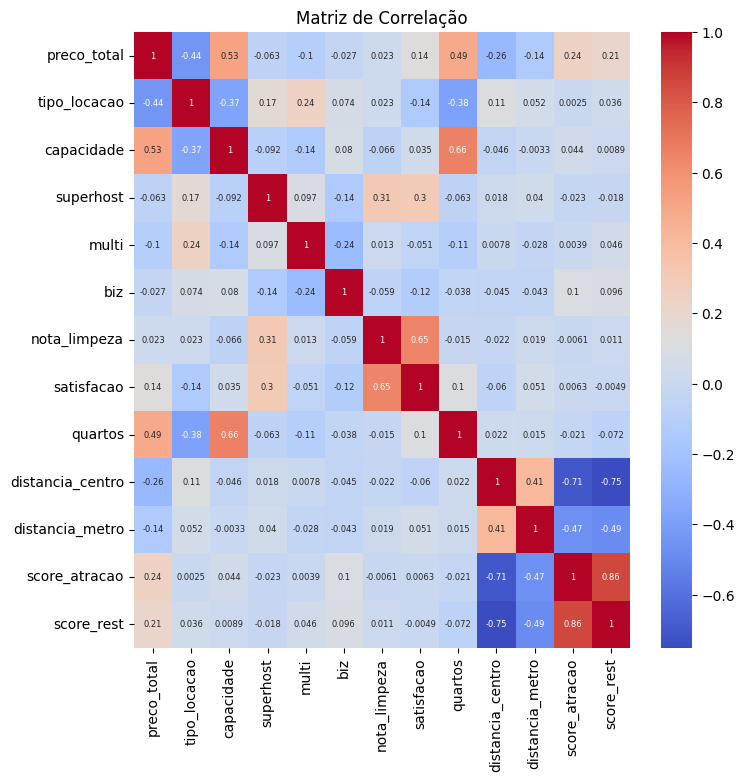

In [ ]:
# Analisando as correlações em um gráfico heatmap com a lib seaborn

correlacao = df_final.corr()
plt.figure(figsize=(8, 8))  # configurando o tamanho do grafico
sns.heatmap(correlacao, annot=True, cmap='coolwarm', annot_kws={"fontsize": 6})  #
plt.title('Matriz de Correlação')
plt.show()


In [ ]:
# Analisando o atributo 'satisfacao'

df_final['satisfacao'].describe()


count    1103.000000
mean       94.362647
std         6.089691
min        20.000000
25%        92.000000
50%        96.000000
75%        98.000000
max       100.000000
Name: satisfacao, dtype: float64

In [ ]:
# Analisando a frequência de distribuição do atributo satisfacao

df_final.groupby(['satisfacao']).size().sort_values(ascending=False).reset_index().rename(columns={0: 'Qtde. satisfações'})


,satisfacao,Qtde. satisfações
0,100.0,190
1,98.0,122
2,96.0,121
3,97.0,95
4,95.0,82
5,94.0,69
6,93.0,67
7,99.0,65
8,90.0,51
9,92.0,48


<Axes: >

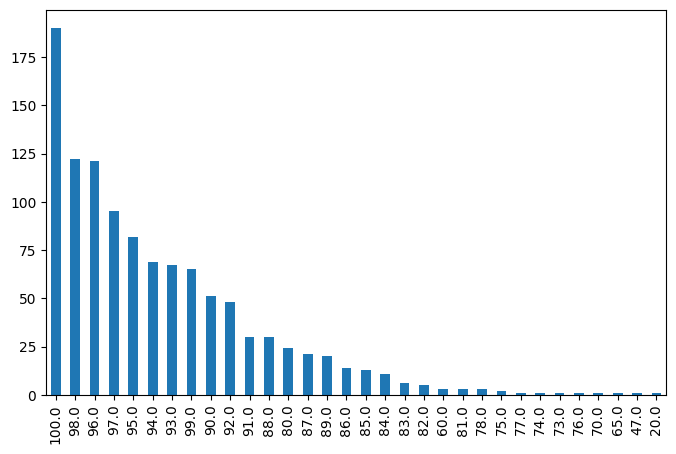

In [ ]:
# Criando um gráfico com a quantidade do filtro sobre 'satisfacao'

df_final['satisfacao'].value_counts().plot.bar(figsize=(8,5))


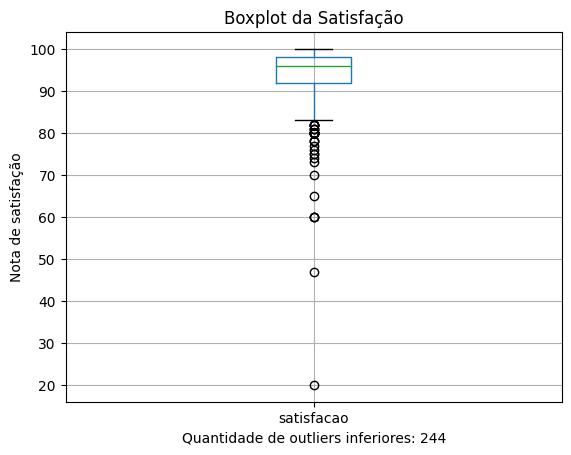

In [ ]:
# Analisando os outliers do atributo 'satisfacao'

df_final.boxplot(column='satisfacao', showfliers=True)

# Configurações do gráfico
plt.xlabel('Quantidade de outliers inferiores: 244')
plt.ylabel('Nota de satisfação')
plt.title('Boxplot da Satisfação')

# Exibição do gráfico
plt.show()

Quantidade de registros com valor menor que 92: 244


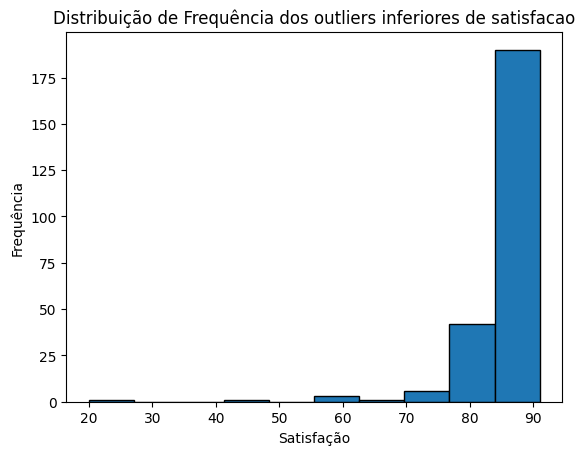

In [ ]:
# Criando um filtro de satisfacao para identificar a quantidade de outliers inferiores(score abaixo de 92)

ft_satis_out_inf = (df_final['satisfacao'] < 92)  # Condicional para analisar a qtde. de outliers inferiores
registros_menor_92 = len(df_final.loc[ft_satis_out_inf])
print(f'Quantidade de registros com valor menor que 92: {registros_menor_92}')

satisfacao_menor_92 = df_final.loc[ft_satis_out_inf, 'satisfacao']

# Plotando o histograma
plt.hist(satisfacao_menor_92, bins=10, edgecolor='black')
plt.xlabel('Satisfação')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequência dos outliers inferiores de satisfacao')
plt.show()


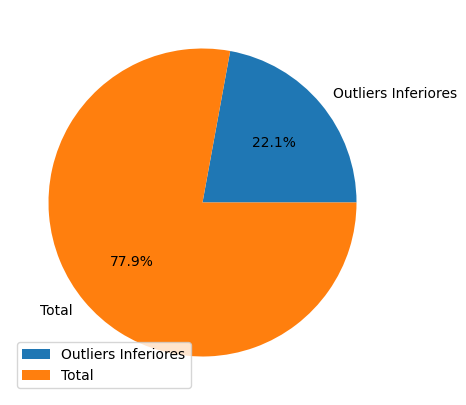

In [ ]:
# Analisando a % que os outliers inferiores de satisfação representam sobre o total de notas de satisfação

quantidade_outliers = 244
quantidade_total = 1103

# Criação do gráfico de pizza
df = pd.DataFrame({'Quantidade': [quantidade_outliers, quantidade_total - quantidade_outliers]},
                  index=['Outliers Inferiores', 'Total'])
df.plot.pie(y='Quantidade', autopct='%1.1f%%', figsize=(5, 5))

# Configurações do gráfico
plt.ylabel('')

# Exibição do gráfico
plt.show()


<Axes: >

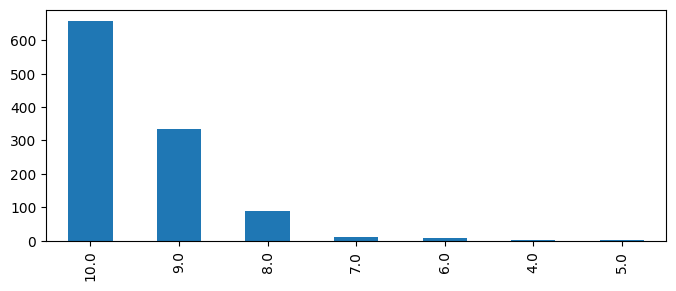

In [ ]:
# Criando um gráfico com a quantidade do filtro sobre 'satisfacao'

df_final['nota_limpeza'].value_counts().plot.bar(figsize=(8,3))


In [ ]:
# correlacao satisfacao - nota_limpeza

correlacao = df_final['satisfacao'].corr(df_final['nota_limpeza'])
print("Correlação entre 'satisfacao' e 'nota_limpeza':", correlacao)


Correlação entre 'satisfacao' e 'nota_limpeza': 0.6488091506956638


In [ ]:
# Analisando o atributo 'limpeza'

df_final['nota_limpeza'].describe()


count    1103.000000
mean        9.461469
std         0.798201
min         4.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: nota_limpeza, dtype: float64

In [ ]:
# Analisando a quantidade de scores de limpeza abaixo da mediana

ft_limp_abaixo_med = (df_final['nota_limpeza'] < 9.46)  # Condicional para analisar a qtde abaixo da mediana
registros_menor = len(df_final.loc[ft_limp_abaixo_med])
print(f'Quantidade de registros com valor menor que a mediana do score de limpeza: {registros_menor}')


Quantidade de registros com valor menor que a mediana do score de limpeza: 444


In [ ]:
# Verificando a distribuição de frequencia de 'nota_limpeza'

df_final['nota_limpeza'].value_counts()


10.0    659
9.0     334
8.0      87
7.0      11
6.0       9
4.0       2
5.0       1
Name: nota_limpeza, dtype: int64

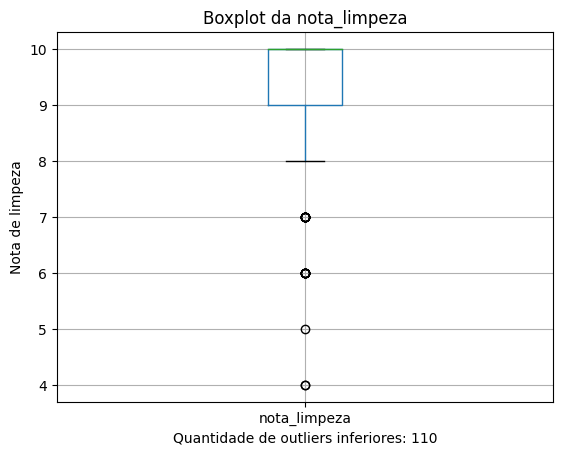

In [ ]:
# Analisando os outliers do atributo 'nota_limpeza'

df_final.boxplot(column='nota_limpeza', showfliers=True)

# Configurações do gráfico
plt.xlabel('Quantidade de outliers inferiores: 110')
plt.ylabel('Nota de limpeza')
plt.title('Boxplot da nota_limpeza')

# Exibição do gráfico
plt.show()

In [ ]:
# Criando um filtro do atributo 'limpeza' para identificar os outliers inferiores

ft_limpeza_out_inf = (df_final['nota_limpeza'] < 9)  # 9 é o valor do 1 quartil, ou seja, tudo abaixo são os outliers inferiores

# Verificando o filtro criado

df_final.loc[ft_limpeza_out_inf]


,id,preco_total,tipo_locacao,capacidade,superhost,multi,biz,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metro,score_atracao,score_rest
1,1,344.25,2,4,0,0,0,8.0,85.0,1,0.49,0.24,33.42,58.34
5,5,552.81,2,3,0,0,0,8.0,100.0,2,2.13,1.90,9.26,15.69
12,12,675.60,1,4,0,0,0,8.0,87.0,1,2.93,0.63,11.38,18.79
14,14,209.03,2,2,0,1,0,8.0,96.0,1,7.30,3.72,3.17,5.27
25,25,217.70,2,2,0,1,0,8.0,93.0,1,4.18,2.81,4.94,8.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1091,167.32,2,2,0,1,0,8.0,87.0,1,4.87,1.58,4.38,7.14
1093,1093,909.47,1,4,0,0,0,8.0,86.0,2,2.14,0.26,21.47,32.10
1096,1096,295.03,2,2,0,0,1,8.0,86.0,1,4.88,0.88,5.68,9.25
1101,1101,1812.86,1,4,0,0,0,8.0,84.0,5,1.94,0.39,13.66,23.45


In [ ]:
# Analisando a frequencia dos outliers inferiores de 'satisfação' que também
# são outliers inferiores de 'nota_limpeza'

df_final.loc[ft_limpeza_out_inf & ft_satis_out_inf]



,id,preco_total,tipo_locacao,capacidade,superhost,multi,biz,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metro,score_atracao,score_rest
1,1,344.25,2,4,0,0,0,8.0,85.0,1,0.49,0.24,33.42,58.34
12,12,675.60,1,4,0,0,0,8.0,87.0,1,2.93,0.63,11.38,18.79
64,64,348.00,1,3,0,0,1,6.0,77.0,2,4.42,0.45,6.21,10.38
71,71,374.94,2,4,0,0,1,6.0,88.0,1,0.94,0.73,16.96,31.92
79,79,317.06,2,2,0,1,0,8.0,90.0,1,2.63,1.17,8.00,13.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,1091,167.32,2,2,0,1,0,8.0,87.0,1,4.87,1.58,4.38,7.14
1093,1093,909.47,1,4,0,0,0,8.0,86.0,2,2.14,0.26,21.47,32.10
1096,1096,295.03,2,2,0,0,1,8.0,86.0,1,4.88,0.88,5.68,9.25
1101,1101,1812.86,1,4,0,0,0,8.0,84.0,5,1.94,0.39,13.66,23.45


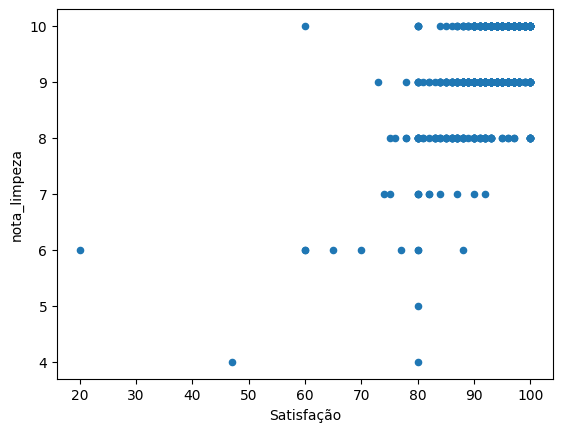

In [ ]:
# Criação do gráfico de dispersão de satisfacao x nota_limpeza

df_final.plot.scatter(x='satisfacao', y='nota_limpeza')

# Configurações do gráfico
plt.xlabel('Satisfação')
plt.ylabel('nota_limpeza')

# Exibição do gráfico
plt.show()


In [ ]:
# Analisando a quantidade de satisfacao 100

filtro_satisfacao = df_final.satisfacao == 100
df_final.loc[filtro_satisfacao]


,id,preco_total,tipo_locacao,capacidade,superhost,multi,biz,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metro,score_atracao,score_rest
5,5,552.81,2,3,0,0,0,8.0,100.0,2,2.13,1.90,9.26,15.69
7,7,2771.31,1,4,1,0,0,10.0,100.0,3,1.69,1.46,11.06,18.98
13,13,552.81,1,2,1,0,0,10.0,100.0,1,1.31,1.34,17.22,27.24
32,32,516.02,1,4,0,0,0,9.0,100.0,2,1.07,0.38,25.83,48.98
33,33,602.25,1,3,0,0,0,10.0,100.0,2,3.86,0.73,7.88,12.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,1056,1941.51,1,2,0,1,0,10.0,100.0,1,0.52,0.29,27.04,52.73
1062,1062,712.86,1,4,0,0,0,10.0,100.0,2,2.25,1.70,14.79,22.05
1063,1063,884.87,1,4,0,0,0,10.0,100.0,2,3.31,1.30,8.81,14.79
1072,1072,847.84,2,2,1,1,0,10.0,100.0,1,1.57,0.67,34.02,43.32


In [ ]:
# Analisando a quantidade de limpeza 10

filtro_limpeza = df_final.nota_limpeza == 10
df_final.loc[filtro_limpeza]


,id,preco_total,tipo_locacao,capacidade,superhost,multi,biz,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metro,score_atracao,score_rest
0,0,194.03,2,2,0,1,0,10.0,93.0,1,5.02,2.54,4.17,6.85
4,4,485.55,2,2,1,0,0,10.0,98.0,1,0.54,0.32,29.27,56.81
6,6,215.12,2,2,0,0,0,10.0,94.0,1,1.88,0.73,10.60,16.92
7,7,2771.31,1,4,1,0,0,10.0,100.0,3,1.69,1.46,11.06,18.98
9,9,276.52,2,2,0,1,0,10.0,88.0,1,3.14,0.92,10.92,16.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1094,228.72,2,3,1,0,0,10.0,98.0,1,7.63,2.93,3.27,5.33
1097,1097,356.20,2,4,1,0,0,10.0,95.0,1,2.17,0.21,11.88,20.33
1098,1098,2486.12,1,2,0,0,0,10.0,100.0,1,2.38,1.44,9.59,15.70
1099,1099,233.64,2,2,0,1,0,10.0,90.0,1,4.72,0.32,5.72,9.39


In [ ]:
# Analisando o preco_total

df_final['preco_total'].describe()


count    1103.000000
mean      545.020535
std       416.974277
min       128.890000
25%       309.800000
50%       430.250000
75%       657.320000
max      7782.910000
Name: preco_total, dtype: float64

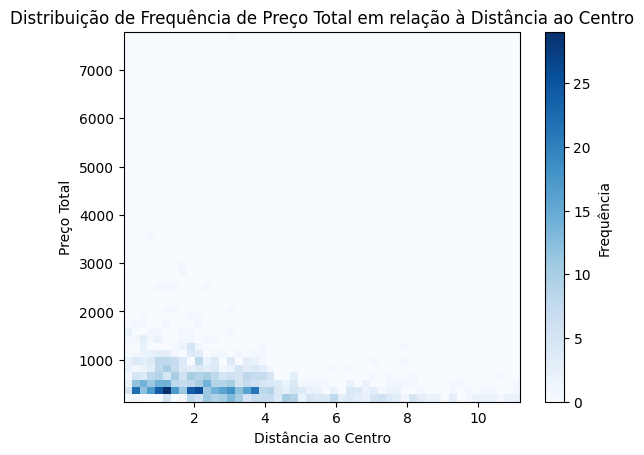

In [ ]:
# Analisando o preco_total em relacao à distancia_centro

# Extrai as colunas 'preco_total' e 'distancia_centro'
preco_total = df_final['preco_total']
distancia_centro = df_final['distancia_centro']

# Cria o histograma
plt.hist2d(distancia_centro, preco_total, bins=(50, 50), cmap='Blues')

# Configurações do gráfico
plt.xlabel('Distância ao Centro')
plt.ylabel('Preço Total')
plt.title('Distribuição de Frequência de Preço Total em relação à Distância ao Centro')

# Adiciona uma barra de cores
plt.colorbar(label='Frequência')

# Exibe o gráfico
plt.show()


## Filtros e GroupBy

In [ ]:
# Filtros e GroupBy

filtro_satisfacao1 = df_final.satisfacao < 92
filtro_superhost = df_final.superhost == 0

dfteste1 = df_final.loc[filtro_satisfacao1 & filtro_superhost]

# Agrupamento
agrupamento = dfteste1.groupby(['satisfacao']).size().sort_values(ascending=False).reset_index().rename(columns={0: 'Não superhost'})

# Quantidade total de registros
quantidade_total = len(dfteste1)

# Imprime o agrupamento e a quantidade total
qtde_satis = len(df_final[filtro_satisfacao1])
print("Quantidade de registros com satisfação menor que 92:", qtde_satis)

print(agrupamento)
print(f'Quantidade total de registros com satisfacao menor que 92, e nao sao superhost: {quantidade_total}')


Quantidade de registros com satisfação menor que 92: 244
    satisfacao  Não superhost
0         90.0             50
1         88.0             29
2         91.0             28
3         80.0             23
4         87.0             20
5         89.0             19
6         85.0             13
7         86.0             13
8         84.0             11
9         83.0              6
10        82.0              5
11        60.0              3
12        78.0              3
13        81.0              3
14        75.0              2
15        65.0              1
16        70.0              1
17        73.0              1
18        47.0              1
19        77.0              1
20        76.0              1
21        74.0              1
22        20.0              1
Quantidade total de registros com satisfacao menor que 92, e nao sao superhost: 236


In [ ]:
# Filtros e GroupBy

filtro_satisfacao = df_final.satisfacao == 100
filtro_nota_limpeza = df_final.nota_limpeza == 10
df_final.loc[filtro_satisfacao & filtro_nota_limpeza]

# Filtros juntos:
dfteste = df_final.loc[filtro_satisfacao & filtro_nota_limpeza]


# Agrupamento
dfteste.groupby(['nota_limpeza']).size().sort_values(ascending=False).reset_index().rename(columns={0: 'Qtde com satisfacao 100'})


,nota_limpeza,Qtde com satisfacao 100
0,10.0,169


In [ ]:
# Filtros e GroupBy

filtro_satisfacao = df_final['satisfacao'] < 92  # Filtrando os outliers inferiores
filtro_nota_limpeza = df_final['nota_limpeza'] < 9  # Filtrando os outliers inferiores

# Filtros juntos:
dfteste = df_final.loc[filtro_satisfacao & filtro_nota_limpeza]


# Agrupamento
dfteste.groupby(['nota_limpeza']).size().sort_values(ascending=False).reset_index().rename(columns={0: 'Qtde'})


,nota_limpeza,Qtde
0,8.0,60
1,7.0,10
2,6.0,9
3,4.0,2
4,5.0,1


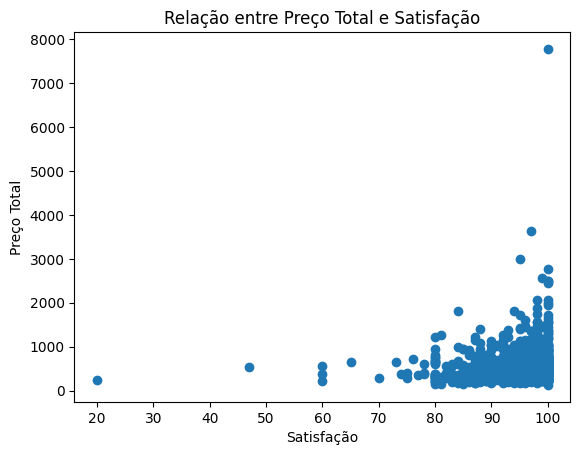

In [ ]:
# Analisando a distribuição de frequencia do preço_total em relação à distância do centro

# Extrai as colunas 'preco_total' e 'distancia_centro'
preco_total = df_final['preco_total']
satisfacao = df_final['satisfacao']

# Cria o gráfico de dispersão
plt.scatter(satisfacao, preco_total)

# Configurações do gráfico
plt.xlabel('Satisfação')
plt.ylabel('Preço Total')
plt.title('Relação entre Preço Total e Satisfação')

# Exibe o gráfico de dispersão
plt.show()


## Resumo da análise


Resumo da Análise de Dados do Airbnb:

Realizei uma análise dos dados da database do Airbnb para obter insights sobre a experiência dos usuários. Os principais passos da análise são os seguintes:

Correlação dos Atributos:

Calculei o coeficiente de correlação entre diferentes atributos para entender as relações lineares entre eles.
Identificamos que alguns pares de atributos apresentaram uma correlação alta ou interessante de se analisar.<br>     
Escolha dos Atributos Principais:

Com base na análise de correlação, selecionei os dois atributos principais: "nota_limpeza" e "satisfacao".
Essa escolha foi feita devido à alta correlação observada entre esses atributos.<br>  
Análise dos Atributos Separadamente:

Realizei uma análise detalhada de cada um dos atributos selecionados.
Visualizei a distribuição dos valores, identifiquei possíveis outliers e fiz análises estatísticas descritivas, como média, mediana e desvio padrão.

Conclusão sobre a Alta Correlação:

A partir da análise separada dos atributos, confirmei que os atributos "nota_limpeza" e "satisfacao" possuem uma correlação significativa.
Isso indica uma forte relação entre esses atributos e sugere que eles são indicadores importantes para avaliar a experiência dos usuários.
Essas descobertas fornecem uma base sólida para a compreensão da relação entre a limpeza das acomodações (nota_limpeza) e a satisfação dos usuários (satisfacao) na plataforma do Airbnb. Essas informações podem ser usadas para orientar melhorias e tomar decisões mais informadas relacionadas à experiência dos usuários.

# Vizualização

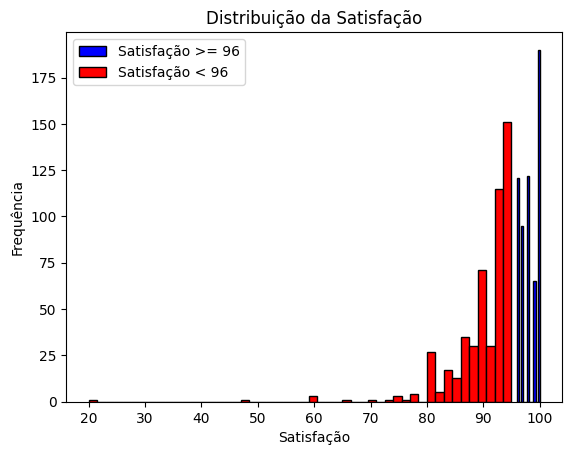

In [ ]:
# Criando um histograma com o atributo 'satisfacao'

# Filtra os valores de satisfação menores que 96
satisfacao_menor_96 = df_final[df_final['satisfacao'] < 96]['satisfacao']

# Filtra os valores de satisfação maiores ou iguais a 96
satisfacao_maior_ou_igual_96 = df_final[df_final['satisfacao'] >= 96]['satisfacao']

# Cria o histograma com as barras vermelhas para satisfações menores que 96
plt.hist(satisfacao_maior_ou_igual_96, bins='auto', edgecolor='black', color='blue', label='Satisfação >= 96')
plt.hist(satisfacao_menor_96, bins='auto', edgecolor='black', color='red', label='Satisfação < 96')

plt.xlabel('Satisfação')
plt.ylabel('Frequência')
plt.title('Distribuição da Satisfação')

# Adiciona a legenda
plt.legend()

plt.show()


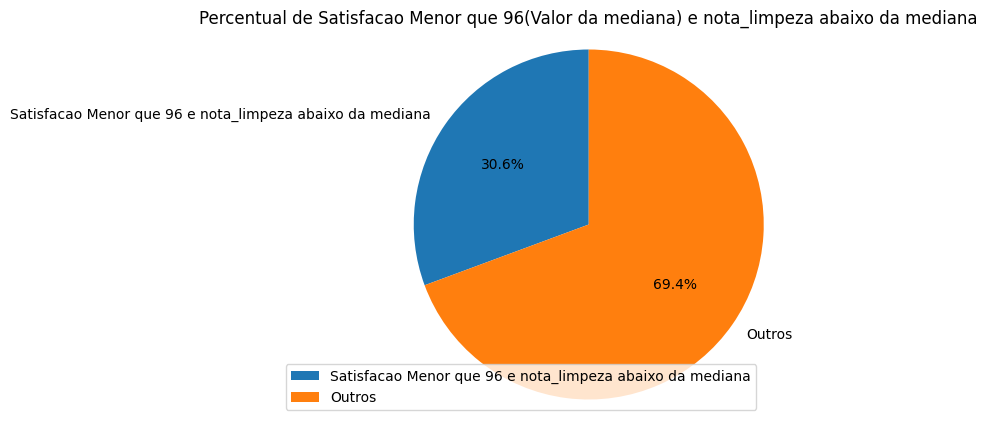

In [ ]:
# Analisando a quantidade de satisfacao ABAIXO da mediana, que também tem a nota_limpeza abaixo da mediana

# Filtra os registros com satisfacao menor que 96 e que tem a nota_limpeza abaixo da mediana
condicao1 = (df_final['satisfacao'] < 96) & (df_final['nota_limpeza'] < 10)
df_filtrado1 = df_final[condicao1]

# Calcula a quantidade de registros filtrados
quantidade_filtrada1 = len(df_filtrado1)

# Calcula a quantidade de registros com satisfacao maior ou igual a 96 e nota_limpeza acima da mediana
quantidade_outros1 = len(df_final) - quantidade_filtrada1

# Cria um DataFrame com as quantidades
df_quantidades1 = pd.DataFrame({
    'Quantidade': [quantidade_filtrada1, quantidade_outros1]
}, index=['Satisfacao Menor que 96 e nota_limpeza abaixo da mediana', 'Outros'])

# Plota o gráfico de pizza
df_quantidades1.plot.pie(y='Quantidade', autopct='%1.1f%%', startangle=90, figsize=(8, 5))
plt.axis('equal')  # Deixa o gráfico circular
plt.ylabel('')  # Remove o rótulo do eixo y
plt.title('Percentual de Satisfacao Menor que 96(Valor da mediana) e nota_limpeza abaixo da mediana')
plt.show()


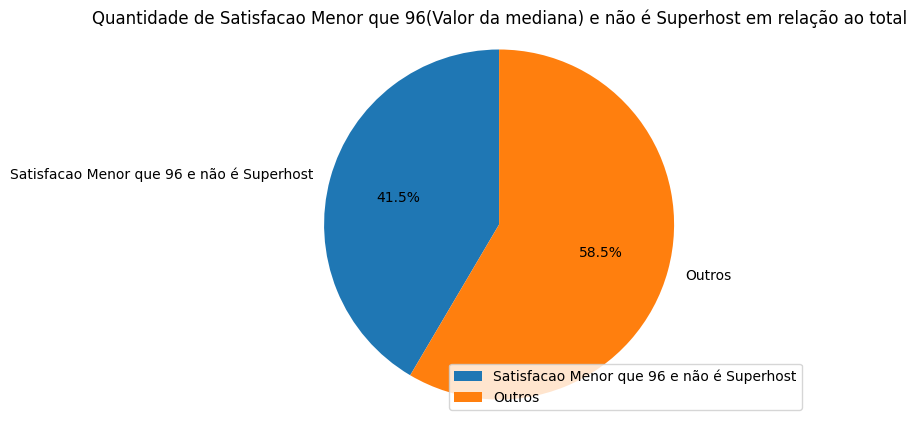

In [ ]:
# Analisando a quantidade de satisfacao ABAIXO da mediana, que NÃO é superhost

# Filtra os registros com satisfacao menor que 96 e que não são Superhosts
condicao = (df_final['satisfacao'] < 96) & (df_final['superhost'] == 0)
df_filtrado = df_final[condicao]

# Calcula a quantidade de registros filtrados
quantidade_filtrada = len(df_filtrado)

# Calcula a quantidade de registros com satisfacao maior ou igual a 96 e/ou que são Superhosts
quantidade_outros = len(df_final) - quantidade_filtrada

# Cria um DataFrame com as quantidades
df_quantidades = pd.DataFrame({
    'Quantidade': [quantidade_filtrada, quantidade_outros]
}, index=['Satisfacao Menor que 96 e não é Superhost', 'Outros'])

# Plota o gráfico de pizza
df_quantidades.plot.pie(y='Quantidade', autopct='%1.1f%%', startangle=90, figsize=(8, 5))
plt.axis('equal')  # Deixa o gráfico circular
plt.ylabel('')  # Remove o rótulo do eixo y
plt.title('Quantidade de Satisfacao Menor que 96(Valor da mediana) e não é Superhost em relação ao total')
plt.show()


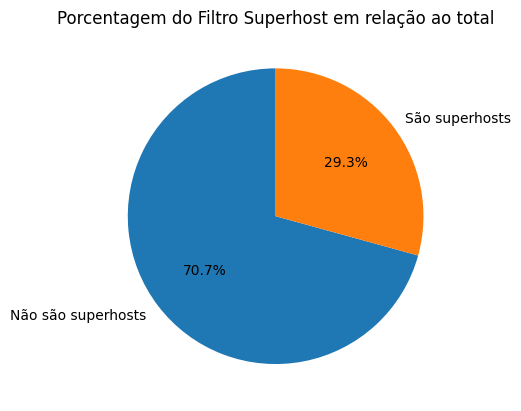

In [ ]:
# Analisando a quantidade de anúncios de superhosts

# Calcula a porcentagem que o filtro representa sobre o total da coluna
filtro_superhost = df_final['superhost'] == 0
porcentagem_filtro_superhost = (filtro_superhost.sum() / len(df_final)) * 100
porcentagem_outros_superhost = 100 - porcentagem_filtro_superhost

# Cria os rótulos
labels = ['Não são superhosts','São superhosts']

# Cria os dados para o gráfico de pizza
dados = [porcentagem_filtro_superhost, porcentagem_outros_superhost]

# Cria o gráfico de pizza
plt.pie(dados, labels=labels, autopct='%1.1f%%', startangle=90)

# Configurações do gráfico
plt.title('Porcentagem do Filtro Superhost em relação ao total')

# Exibe o gráfico
plt.show()


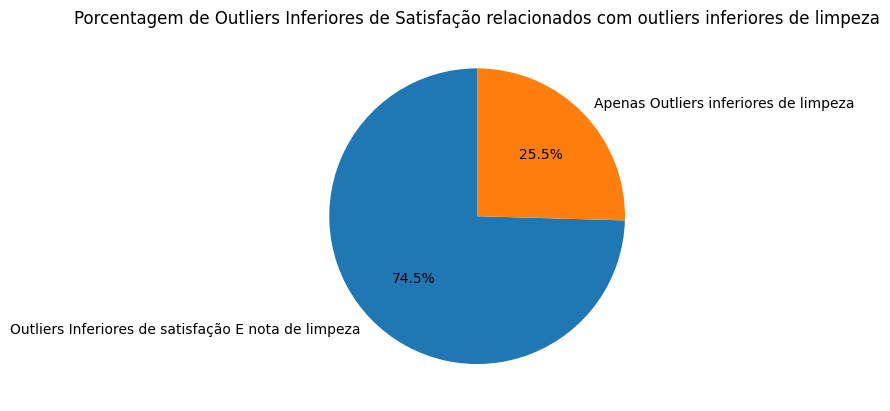

In [ ]:
# Dos 110 outliers inferiores de limpeza, 82 deles são outliers inferiores de satisfação também!

quantidade_total = 110
quantidade_outliers_satisfacao = 82

# Calcula a porcentagem
porcentagem_outliers_satisfacao = (quantidade_outliers_satisfacao / quantidade_total) * 100
porcentagem_outliers_nao_satisfacao = 100 - porcentagem_outliers_satisfacao

# Cria os rótulos
labels = ['Outliers Inferiores de satisfação E nota de limpeza', 'Apenas Outliers inferiores de limpeza ']

# Cria os dados para o gráfico de pizza
dados = [porcentagem_outliers_satisfacao, porcentagem_outliers_nao_satisfacao]

# Cria o gráfico de pizza
plt.pie(dados, labels=labels, autopct='%1.1f%%', startangle=90)

# Configurações do gráfico
plt.title('Porcentagem de Outliers Inferiores de Satisfação relacionados com outliers inferiores de limpeza')

# Exibe o gráfico
plt.show()


# Conclusões

## Análise S.W.O.T

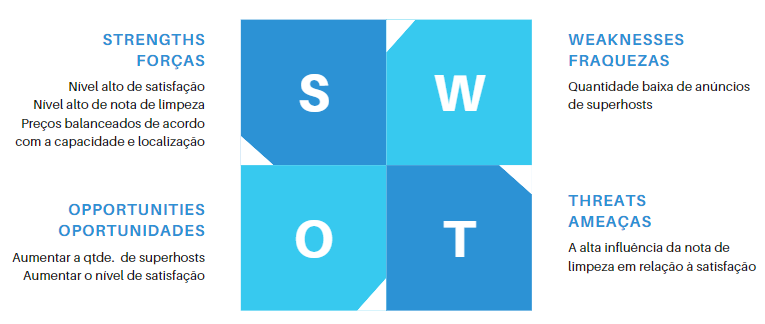

## Conclusão final

Após as análises, conclui que a nota de limpeza é o atributo que mais influencia na satisfação do usuário.

Portanto a preocupação com a limpeza se tornou uma ameaça e oportunidade, pois após a análise do atributo nota_limpeza,  verifiquei que a grande maioria dos anúncios com notas mais baixas de limpeza também possuem as notas mais baixas de satisfação.

Incentivar os anunciantes a manterem o local anunciado limpo, oferecer informações de como proceder com a limpeza e manutenção dos locais, ajudará a evitar a queda da satisfação.

Vendo como oportunidade, a empresa poderia revisar os requisitos de limpeza para se tornar um superhost, além de aumentar os benefícios associados a esse status. Isso poderia aumentar o interesse dos anunciantes em se tornarem superhosts, o que, por sua vez, poderia levar a uma melhoria na qualidade dos serviços oferecidos. Como resultado, a satisfação dos usuários do aplicativo também seria aumentada.